In [ ]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy.random import seed
seed(1052023)
from random import randrange

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("S&P 500 Realized Volatility.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

# Hyperparameter search

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
dilations = [[1,2,1],[1,2,2,1],[1,2,4,1],[1,2,2,2,1],[1,2,4,2,1],[1,2,4,4,1]]
kernel_size=[2,3,4,6]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
94/94 [==============================] - 15s 83ms/step - loss: 1.0168 - accuracy: 3.3456e-04 - mean_absolute_error: 0.5051
Epoch 2/15
94/94 [==============================] - 8s 83ms/step - loss: 0.0139 - accuracy: 6.6912e-04 - mean_absolute_error: 0.0861
Epoch 3/15
94/94 [==============================] - 4s 44ms/step - loss: 0.0073 - accuracy: 6.6912e-04 - mean_absolute_error: 0.0614
Epoch 4/15
94/94 [==============================] - 6s 60ms/step - loss: 0.0116 - accuracy: 6.6912e-04 - mean_absolute_error: 0.0787
Epoch 5/15
94/94 [==============================] - 5s 54ms/step - loss: 0.0055 - accuracy: 6.6912e-04 - mean_absolute_error: 0.0532
Epoch 6/15
94/94 [==============================] - 4s 44ms/step - loss: 0.0051 - accuracy: 6.6912e-04 - mean_absolute_error: 0.0528
Epoch 7/15
94/94 [==============================] - 6s 59ms/step - loss: 0.0072 - accuracy: 6.6912e-04 - mean_absolute_error: 0.0633
Epoch 8/15
94/94 [==============================] - 4s 48ms/step - l

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/7
95/95 [==============================] - 11s 83ms/step - loss: 0.2499 - accuracy: 6.6445e-04 - mean_absolute_error: 0.4838
Epoch 2/7
95/95 [==============================] - 8s 80ms/step - loss: 0.0095 - accuracy: 6.6445e-04 - mean_absolute_error: 0.1036
Epoch 3/7
95/95 [==============================] - 6s 68ms/step - loss: 0.0045 - accuracy: 6.6445e-04 - mean_absolute_error: 0.0646
Epoch 4/7
95/95 [==============================] - 6s 68ms/step - loss: 0.0040 - accuracy: 6.6445e-04 - mean_absolute_error: 0.0671
Epoch 5/7
95/95 [==============================] - 8s 83ms/step - loss: 0.0031 - accuracy: 6.6445e-04 - mean_absolute_error: 0.0575
Epoch 6/7
95/95 [==============================] - 7s 74ms/step - loss: 0.0039 - accuracy: 6.6445e-04 - mean_absolute_error: 0.0667
Epoch 7/7
1/1 [==============================] - 0s 24ms/step
Epoch: 7 | Inputs: 63 | Kernel: 6 | Dropout: 0 | Loss: huber_loss
RMSE: 0.00306162968555254 | Accuracy: 25.673643575974847
Epoch 1/5
96/96 [=====

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/10
95/95 [==============================] - 9s 61ms/step - loss: 15.0104 - accuracy: 0.0000e+00 - mean_absolute_error: 1.8806
Epoch 2/10
95/95 [==============================] - 7s 69ms/step - loss: 0.8073 - accuracy: 3.3223e-04 - mean_absolute_error: 0.7000
Epoch 3/10
95/95 [==============================] - 7s 73ms/step - loss: 0.4120 - accuracy: 3.3223e-04 - mean_absolute_error: 0.4953
Epoch 4/10
95/95 [==============================] - 6s 61ms/step - loss: 0.2342 - accuracy: 6.6445e-04 - mean_absolute_error: 0.3755
Epoch 5/10
95/95 [==============================] - 6s 58ms/step - loss: 0.1585 - accuracy: 3.3223e-04 - mean_absolute_error: 0.3054
Epoch 6/10
95/95 [==============================] - 6s 58ms/step - loss: 0.1054 - accuracy: 3.3223e-04 - mean_absolute_error: 0.2470
Epoch 7/10
95/95 [==============================] - 6s 58ms/step - loss: 0.0803 - accuracy: 3.3223e-04 - mean_absolute_error: 0.2094
Epoch 8/10
95/95 [==============================] - 7s 69ms/step - l

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(6)
    n=randrange(3)
    o=randrange(2)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                      dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
    model.fit(generator,epochs=epochs[m])
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
96/96 [==============================] - 4s 17ms/step - loss: 0.0725 - accuracy: 3.2765e-04 - mean_absolute_error: 0.2316
Epoch 2/15
96/96 [==============================] - 2s 18ms/step - loss: 0.0040 - accuracy: 3.2765e-04 - mean_absolute_error: 0.0631
Epoch 3/15
96/96 [==============================] - 2s 24ms/step - loss: 0.0029 - accuracy: 3.2765e-04 - mean_absolute_error: 0.0537
Epoch 4/15
96/96 [==============================] - 2s 18ms/step - loss: 0.0026 - accuracy: 6.5531e-04 - mean_absolute_error: 0.0510
Epoch 5/15
96/96 [==============================] - 2s 17ms/step - loss: 0.0025 - accuracy: 6.5531e-04 - mean_absolute_error: 0.0492
Epoch 6/15
96/96 [==============================] - 2s 17ms/step - loss: 0.0037 - accuracy: 6.5531e-04 - mean_absolute_error: 0.0598
Epoch 7/15
96/96 [==============================] - 2s 20ms/step - loss: 0.0025 - accuracy: 6.5531e-04 - mean_absolute_error: 0.0497
Epoch 8/15
96/96 [==============================] - 3s 28ms/step - lo

Epoch: 15 | Inputs: 126 | Kernel: 4 | Dropout: 0.2 | Loss: huber_loss
RMSE: 0.0017459875044265943 | Accuracy: 64.4486011454203

# H=1 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 126
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=15)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(len(test)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  a=np.delete(a,1754)
  test1=np.delete(test,1754) #needed since this value equals 0
  Accuracy.append((1-np.sum(a/test1)/(len(test)-1))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 31ms/step
Epoch 1/15
124/124 [==============================] - 8s 13ms/step - loss: 0.0997 - accuracy: 2.5208e-04 - mean_absolute_error: 0.2182
Epoch 2/15
124/124 [==============================] - 2s 13ms/step - loss: 0.0050 - accuracy: 2.5208e-04 - mean_absolute_error: 0.0647
Epoch 3/15
124/124 [==============================] - 2s 13ms/step - loss: 0.0038 - accuracy: 2.5208e-04 - mean_absolute_error: 0.0554
Epoch 4/15
124/124 [==============================] - 2s 13ms/step - loss: 0.0034 - accuracy: 5.0416e-04 - mean_absolute_error: 0.0516
Epoch 5/15
124/124 [==============================] - 2s 13ms/step - loss: 0.0025 - accuracy: 5.0416e-04 - mean_absolute_error: 0.0453
Epoch 6/15
124/124 [==============================] - 2s 15ms/step - loss: 0.0021 - accuracy: 5.0416e-04 - mean_absolute_error: 0.0421
Epoch 7/15
124/124 [==============================] - 2s 13ms/step - loss: 0.0020 - 

In [ ]:
Accuracy

[63.95084321272042,
 53.91928727035371,
 58.44963233910625,
 60.75768444131005,
 59.40896353737762,
 62.2550031716972,
 61.24746027268969,
 61.93524852095141,
 61.04825790238352,
 59.087820040608484,
 58.87557432972703,
 58.97636513334666,
 61.34196476868872,
 49.69062725180724,
 59.52472343800911]

In [ ]:
RMSE

[0.0025506595249518618,
 0.0027109926703613473,
 0.0026336538283366745,
 0.002654029293147382,
 0.0027035232877980144,
 0.0025664367878093313,
 0.0026497366274384087,
 0.002527520931184527,
 0.002659484637226446,
 0.002612080580200494,
 0.002672550558929004,
 0.002637849374242567,
 0.002577893373504765,
 0.0028566614095807187,
 0.0025891135718607993]

In [ ]:
Quasilikelihood



[0.09325198749591404,
 0.12987974967477,
 0.11137978732572014,
 0.10444507690489419,
 0.11246434069410187,
 0.09811740826370122,
 0.10432678176641824,
 0.09917927508609606,
 0.10475435482715932,
 0.11145902330423099,
 0.11025122925510557,
 0.11025725506222182,
 0.1034721827512425,
 0.14595025876761705,
 0.10801682623154889]

Text(0, 0.5, 'S&P 500 Realized Volatility')

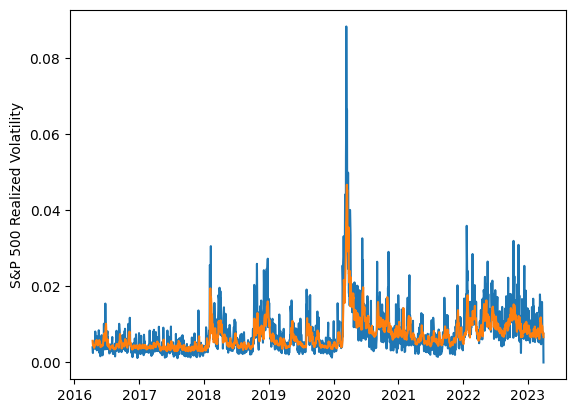

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")

# H=3 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (1):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 126
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=15)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/3)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1755,1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  a=np.delete(a,1754)
  test1=np.delete(test,1754) #needed since this value equals 0
  Accuracy.append((1-np.sum(a/test1)/(len(test)-1))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/15
124/124 [==============================] - 11s 15ms/step - loss: 0.1506 - accuracy: 0.3713 - mean_absolute_error: 0.2865
Epoch 2/15
124/124 [==============================] - 1s 11ms/step - loss: 0.0075 - accuracy: 0.2992 - mean_absolute_error: 0.0762
Epoch 3/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0046 - accuracy: 0.2604 - mean_absolute_error: 0.0597
Epoch 4/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.2760 - mean_absolute_error: 0.0520
Epoch 5/15
124/124 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 0.3033 - mean_absolute_error: 0.0469
Epoch 6/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.2909 - mean_absolute_error: 0.0433
Epoch 7/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0022 - accuracy: 0.2909 - mean_absolute_error: 0.0420
Epoch 8/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0020 - acc

In [ ]:
RMSE

[0.0027806534095419374,
 0.002714329985070295,
 0.0029330580720998835,
 0.0027756602539315005,
 0.0027566184421864122,
 0.002775928007744872,
 0.0028351733406132883,
 0.0028176604381698334,
 0.002750562164155266,
 0.002781800382243652,
 0.0028461986305101656,
 0.0027524339652248474,
 0.002810748418317506,
 0.0028841788955371946,
 0.002818503651216627]

In [ ]:
Accuracy

[59.05386196786117,
 60.450138501947535,
 58.475002029446934,
 58.13482505502062,
 59.01148266571141,
 61.385820478547984,
 55.738110844911034,
 57.514507312180285,
 59.01857615009243,
 58.60859766939222,
 55.69741559238012,
 59.174818056415624,
 56.070054075433475,
 61.56868254844865,
 57.82535883854065]

In [ ]:
Quasilikelihood

[0.11576809382744198,
 0.10760012684623767,
 0.12312185247591398,
 0.11693690444544295,
 0.11362578304847214,
 0.10755486163193374,
 0.12382341087227017,
 0.1217280036878822,
 0.11359956536827293,
 0.11659147650786643,
 0.1258603747178269,
 0.11409264140294151,
 0.12605468104811288,
 0.1115013946690701,
 0.11954708672562386]

Text(0, 0.5, 'S&P 500 Realized Volatility')

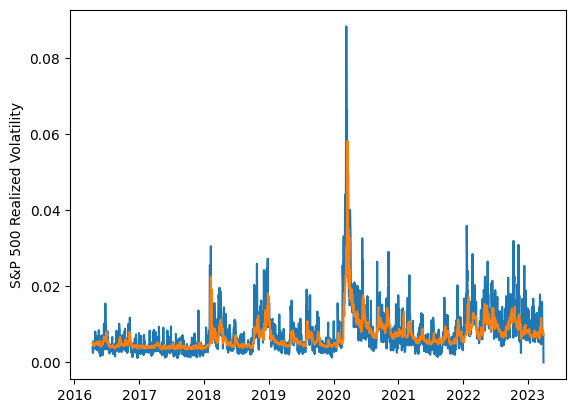

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")

# H=5 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 126
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=15)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/5)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1755,1)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  a=np.delete(a,1754)
  test1=np.delete(test,1754) #needed since this value equals 0
  Accuracy.append((1-np.sum(a/test1)/(len(test)-1))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Streaminguitvoer ingekort tot de laatste 5000 regels.
1/1 [==============================] - 0s 27ms/step
Epoch 1/15
124/124 [==============================] - 7s 10ms/step - loss: 0.0690 - accuracy: 0.2196 - mean_absolute_error: 0.1788
Epoch 2/15
124/124 [==============================] - 1s 10ms/step - loss: 0.0050 - accuracy: 0.2012 - mean_absolute_error: 0.0620
Epoch 3/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.2153 - mean_absolute_error: 0.0510
Epoch 4/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.2228 - mean_absolute_error: 0.0443
Epoch 5/15
124/124 [==============================] - 2s 12ms/step - loss: 0.0021 - accuracy: 0.2491 - mean_absolute_error: 0.0417
Epoch 6/15
124/124 [==============================] - 2s 12ms/step - loss: 0.0019 - accuracy: 0.2617 - mean_absolute_error: 0.0391
Epoch 7/15
124/124 [==============================] - 1s 10ms/step - loss: 0.0018 - accuracy: 0.2213 - mean_ab

In [ ]:
RMSE

[0.0028874210881972145,
 0.0029389259868065998,
 0.0028544789884483754,
 0.002816656706987997,
 0.002895775284724663,
 0.0028131008305707327,
 0.0030869601312214262,
 0.002910355457829735,
 0.002895101904042406,
 0.002945557708772255,
 0.002989670005699868,
 0.002822418770566189,
 0.002915959776038789,
 0.0029810853155017125,
 0.0028960115533784637]

In [ ]:
Accuracy

[56.1278714183985,
 50.93585698127194,
 56.31996950431073,
 57.54443068051954,
 52.71410167463044,
 59.500756099848175,
 49.13063965352453,
 53.02560273813677,
 54.98130638187341,
 59.426641595866684,
 51.34507860669415,
 62.100734723308946,
 53.13168144928242,
 59.05026916291614,
 54.71530470748094]

In [ ]:
Quasilikelihood

[0.1285720393589127,
 0.14712292400410454,
 0.12753121383143196,
 0.12179519162357809,
 0.14041430320855075,
 0.11453213793410427,
 0.15237909735221095,
 0.13882271784951244,
 0.13202799333122298,
 0.12004340417745023,
 0.14436908020535477,
 0.10718347041062727,
 0.1392556035426411,
 0.12348146297098984,
 0.13215527797085394]

Text(0, 0.5, 'S&P 500 Realized Volatility')

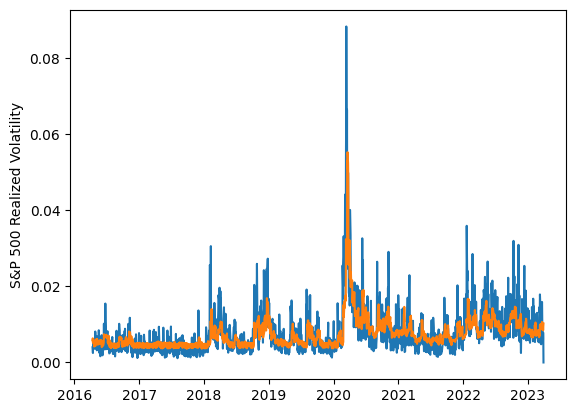

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")

# H=10 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 126
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=15)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/10)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1750,1)
  test=test[:1750]
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  Accuracy.append((1-np.sum(a/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/15
124/124 [==============================] - 6s 10ms/step - loss: 0.0671 - accuracy: 0.0842 - mean_absolute_error: 0.1767
Epoch 2/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0045 - accuracy: 0.0731 - mean_absolute_error: 0.0598
Epoch 3/15
124/124 [==============================] - 1s 11ms/step - loss: 0.0031 - accuracy: 0.0817 - mean_absolute_error: 0.0496
Epoch 4/15
124/124 [==============================] - 2s 12ms/step - loss: 0.0025 - accuracy: 0.0729 - mean_absolute_error: 0.0446
Epoch 5/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.0620 - mean_absolute_error: 0.0425
Epoch 6/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 0.0628 - mean_absolute_error: 0.0406
Epoch 7/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.0605 - mean_absolute_error: 0.0394
Epoch 8/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0018 - accu

In [ ]:
RMSE

[0.003157723904380336,
 0.0031668648566307114,
 0.003149947160479544,
 0.0032756306717357697,
 0.0031969616831820234,
 0.0031029882872124982,
 0.003112597489497089,
 0.003347895019968279,
 0.003231266335158766,
 0.0031160197021169915,
 0.003158705695533609,
 0.00313664434724891,
 0.003168017545459796,
 0.0031337208134372477,
 0.0031288442613442687]

In [ ]:
Accuracy

[51.680972207880174,
 55.046352565673885,
 52.79804920478593,
 44.73382201741962,
 48.43182938240124,
 55.58557612322635,
 54.60062564876962,
 47.96898628634455,
 50.044223294171786,
 54.265205982211626,
 53.41551232357333,
 55.69033349491013,
 56.93196305599353,
 56.40948042666041,
 55.417786441545445]

In [ ]:
Quasilikelihood

[0.1527539289556977,
 0.14218907745890202,
 0.1453412518030832,
 0.17846057196051773,
 0.16347957941370622,
 0.13791353530668346,
 0.14058408901292646,
 0.16481931862693586,
 0.15493152924520032,
 0.1428938517734988,
 0.14539214541803486,
 0.13641368375163893,
 0.13500196450297314,
 0.13433819240902542,
 0.13867028134354542]

Text(0, 0.5, 'S&P 500 Realized Volatility')

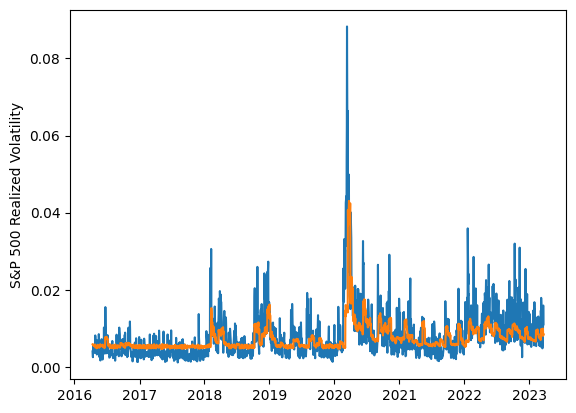

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")

# H=22 Forecasts

In [ ]:
Accuracy=[]
RMSE=[]
Quasilikelihood=[]

In [ ]:
for m in range (14):
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7):]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  n_features = 2
  n_input = 126
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,2,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=15)
  last_train_batch = scaled_train_input[-n_input:]
  last_train_batch = last_train_batch.reshape((1, n_input, n_features))
  a = np.array(scaled_test_input)
  test_predictions = []
  first_eval_batch = scaled_train_input[-n_input:]
  current_batch = first_eval_batch.reshape((1, n_input, n_features))
      
  for j in range(int(len(test)/22)):
              # get the prediction value for the first batch
      current_pred = model.predict(current_batch)[0]
              # append the prediction into the array
      test_predictions.append(current_pred) 
              # use the prediction to update the batch and remove the first value
      current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
  true_predictions = scaler.inverse_transform(test_predictions)
  true_predictions=true_predictions.reshape(1738,1)
  test=test[:1738]
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  a=np.sqrt((test-true_predictions)**2)
  Accuracy.append((1-np.sum(a/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/15
124/124 [==============================] - 8s 11ms/step - loss: 0.0550 - accuracy: 0.0537 - mean_absolute_error: 0.1440
Epoch 2/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.0449 - mean_absolute_error: 0.0525
Epoch 3/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0027 - accuracy: 0.0416 - mean_absolute_error: 0.0456
Epoch 4/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 0.0277 - mean_absolute_error: 0.0430
Epoch 5/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0021 - accuracy: 0.0345 - mean_absolute_error: 0.0415
Epoch 6/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.0292 - mean_absolute_error: 0.0394
Epoch 7/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0018 - accuracy: 0.0275 - mean_absolute_error: 0.0380
Epoch 8/15
124/124 [==============================] - 1s 9ms/step - loss: 0.0017 - accura

In [ ]:
RMSE

[0.0037493969244070786,
 0.0034931987132547477,
 0.003475574279593192,
 0.0036180781301064216,
 0.0036963159867301324,
 0.0036454993402035953,
 0.0036109868240503766,
 0.003599668959962031,
 0.0036101597396963957,
 0.003724127788640392,
 0.0037066430837565108,
 0.0035059219578411883,
 0.0036776258829974854,
 0.00366487472508047,
 0.003678335685978301]

In [ ]:
Accuracy

[47.29399592207037,
 50.54912992788678,
 49.7121464976567,
 45.13284245875654,
 48.12860450073042,
 45.431902190856775,
 47.44872030275119,
 47.331615860462215,
 47.30448677396759,
 47.01797169578668,
 44.055749093584794,
 49.527669885010305,
 45.990606645642494,
 47.62803497870773,
 46.58677872785132]

In [ ]:
Quasilikelihood

[0.17781436549289692,
 0.1640603498655533,
 0.16715070057779774,
 0.18404417674878812,
 0.17416061846063985,
 0.18276010068495907,
 0.17528141543291387,
 0.17763301618874866,
 0.1764955206265386,
 0.17796699053551415,
 0.1905969857287445,
 0.16652387519411618,
 0.1826004583315942,
 0.1735535562107441,
 0.17859223199256263]

Text(0, 0.5, 'S&P 500 Realized Volatility')

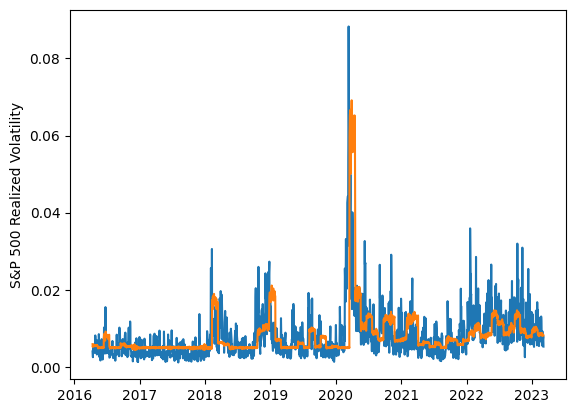

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")